In [48]:
#Importing libraries and data
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pickle

In [2]:
data = pd.read_csv('Group_9_data_cleaned.csv')
data.head(3)

,Unnamed: 0,current_1,current_2,current_3,current_4,current_5,current_6,current_7,current_8,current_9,...,current_40,current_41,current_42,current_43,current_44,current_45,current_46,current_47,current_48,output
0,0,-3.014600e-07,0.000008,-0.000012,-0.000002,-0.000001,-0.000021,0.031718,0.03171,0.031721,...,-0.63308,2.9646,8.1198,-1.4961,-1.4961,-1.4961,-1.4996,-1.4996,-1.4996,1
1,1,2.913200e-06,-0.000005,0.000003,-0.000006,0.000003,-0.000004,0.030804,0.03081,0.030806,...,-0.59314,7.6252,6.1690,-1.4967,-1.4967,-1.4967,-1.5005,-1.5005,-1.5005,1
2,2,-2.951700e-06,-0.000003,-0.000016,-0.000001,-0.000002,0.000017,0.032877,0.03288,0.032896,...,-0.63252,2.7784,5.3017,-1.4983,-1.4983,-1.4982,-1.4985,-1.4985,-1.4985,1


In [3]:
# removing a redundant column
df = data.drop(['Unnamed: 0'],axis=1)
df.head()

,current_1,current_2,current_3,current_4,current_5,current_6,current_7,current_8,current_9,current_10,...,current_40,current_41,current_42,current_43,current_44,current_45,current_46,current_47,current_48,output
0,-3.014600e-07,8.260300e-06,-0.000012,-0.000002,-1.438600e-06,-0.000021,0.031718,0.031710,0.031721,-0.032963,...,-0.63308,2.9646,8.1198,-1.4961,-1.4961,-1.4961,-1.4996,-1.4996,-1.4996,1
1,2.913200e-06,-5.247700e-06,0.000003,-0.000006,2.778900e-06,-0.000004,0.030804,0.030810,0.030806,-0.033520,...,-0.59314,7.6252,6.1690,-1.4967,-1.4967,-1.4967,-1.5005,-1.5005,-1.5005,1
2,-2.951700e-06,-3.184000e-06,-0.000016,-0.000001,-1.575300e-06,0.000017,0.032877,0.032880,0.032896,-0.029834,...,-0.63252,2.7784,5.3017,-1.4983,-1.4983,-1.4982,-1.4985,-1.4985,-1.4985,1
3,-1.322600e-06,8.820100e-06,-0.000016,-0.000005,-7.282900e-07,0.000004,0.029410,0.029401,0.029417,-0.030156,...,-0.62289,6.5534,6.2606,-1.4963,-1.4963,-1.4963,-1.4975,-1.4975,-1.4976,1
4,-6.836600e-08,5.666300e-07,-0.000026,-0.000006,-7.940600e-07,0.000013,0.030119,0.030119,0.030145,-0.031393,...,-0.63010,4.5155,9.5231,-1.4958,-1.4958,-1.4958,-1.4959,-1.4959,-1.4959,1


In [4]:
df.shape

(58509, 49)

In [5]:
df.describe()

,current_1,current_2,current_3,current_4,current_5,current_6,current_7,current_8,current_9,current_10,...,current_40,current_41,current_42,current_43,current_44,current_45,current_46,current_47,current_48,output
count,58509.000000,5.850900e+04,5.850900e+04,5.850900e+04,5.850900e+04,5.850900e+04,58509.000000,58509.000000,58509.000000,58509.000000,...,58509.000000,58509.000000,58509.000000,58509.000000,58509.000000,58509.000000,58509.000000,58509.000000,58509.000000,58509.000000
mean,-0.000003,1.756436e-06,1.111802e-06,-9.722586e-07,1.775487e-06,-7.457535e-07,0.002854,0.002849,0.002849,-0.006349,...,-0.650427,5.730645,7.702923,-1.500891,-1.500915,-1.500809,-1.497787,-1.497814,-1.497710,6.000000
std,0.000008,3.199783e-05,1.520782e-04,7.956279e-06,3.234750e-05,1.490893e-04,0.033692,0.033700,0.033701,0.050735,...,0.100670,5.781169,4.347205,0.003629,0.003640,0.003600,0.003002,0.002984,0.002988,3.162305
min,-0.000021,-6.427550e-05,-2.937900e-04,-1.887580e-05,-6.547550e-05,-2.915565e-04,-0.086972,-0.087041,-0.086978,-0.111281,...,-0.902350,-0.596830,0.320660,-1.510950,-1.511200,-1.510700,-1.504700,-1.504550,-1.504450,1.000000
25%,-0.000007,-1.444400e-05,-7.239600e-05,-5.417500e-06,-1.475300e-05,-7.379100e-05,-0.019927,-0.019951,-0.019925,-0.032144,...,-0.715470,1.450300,4.436300,-1.503300,-1.503400,-1.503200,-1.499600,-1.499600,-1.499500,3.000000
50%,-0.000003,8.804600e-07,5.137700e-07,-1.059100e-06,7.540200e-07,-1.659300e-07,0.013226,0.013230,0.013247,-0.015566,...,-0.661710,3.301300,6.479100,-1.500300,-1.500300,-1.500300,-1.498100,-1.498100,-1.498000,6.000000
75%,0.000002,1.877700e-05,7.520000e-05,3.554700e-06,1.906200e-05,7.138600e-05,0.024770,0.024776,0.024777,0.020614,...,-0.573980,8.288500,9.857500,-1.498200,-1.498200,-1.498200,-1.496200,-1.496300,-1.496200,9.000000
max,0.000015,6.860850e-05,2.965940e-04,1.701300e-05,6.978450e-05,2.891515e-04,0.069125,0.069130,0.069131,0.099751,...,-0.361745,18.545800,17.989300,-1.490550,-1.490400,-1.490700,-1.491100,-1.491350,-1.491250,11.000000


In [6]:
# The output variable has 11 different classes 
df['output'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64)

In [7]:
# It is a balanced dataset with equal number of classes.
df['output'].value_counts()

1     5319
2     5319
3     5319
4     5319
5     5319
6     5319
7     5319
8     5319
9     5319
10    5319
11    5319
Name: output, dtype: int64

# classification - knn

In [8]:
X = df.drop(['output'],axis=1)
y = df['output']


In [21]:
# using standard scalaing for the input data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_X = scaler.fit_transform(X)
print(scaled_X)

[[0.5730026  0.54585804 0.47811763 ... 0.375      0.375      0.36742424]
 [0.66228185 0.44420547 0.50328617 ... 0.30882353 0.30681818 0.29924242]
 [0.49939872 0.45973556 0.47065977 ... 0.45588235 0.45833333 0.45075758]
 ...
 [0.41869175 0.62362286 0.32534757 ... 1.         1.         1.        ]
 [0.45803432 0.73932528 0.         ... 0.84558824 0.85984848 0.85984848]
 [0.33549635 0.87696412 0.62036912 ... 0.75       0.75378788 0.76893939]]


In [22]:
# dividing the dataset into train,test and validation sets
X_train, X_rem, y_train, y_rem  = train_test_split(scaled_X, y, train_size = 0.5, random_state = 100)
X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, test_size = 0.5, random_state = 100)

In [23]:
# The shape of training dataset
print(f" The input training  data shape is {X_train.shape}")
print(f" The  output training data shape is {y_train.shape}")
print(f" The input validation  data shape is {X_valid.shape}")
print(f" The  output validation data shape is {y_valid.shape}")
# The shape of the test dataset 
print(f" The input testing  data shape is {X_valid.shape}")
print(f" The  output testing data shape is {y_valid.shape}")

 The input training  data shape is (29254, 48)
 The  output training data shape is (29254,)
 The input validation  data shape is (14627, 48)
 The  output validation data shape is (14627,)
 The input testing  data shape is (14627, 48)
 The  output testing data shape is (14627,)


In [24]:
# Taking a random knn model \
# selecting a random model 
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [25]:
# accuracy scores on the three datasets
print(f" Random model training score is {model_knn.score(X_train,y_train)}")
print(f" Random model validation data score is {model_knn.score(X_valid,y_valid)}")
print(f" Random model testing score is {model_knn.score(X_test,y_test)}")

 Random model training score is 0.8858617624940179
 Random model validation data score is 0.7978396116770357
 Random model testing score is 0.7950505879135904


In [27]:
from sklearn.metrics import confusion_matrix, classification_report, recall_score, accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

In [28]:
# classification report for validation dataset
y_pred_va = model_knn.predict(X_valid)
print(classification_report(y_pred_va,y_valid))

              precision    recall  f1-score   support

           1       0.77      0.69      0.73      1473
           2       0.75      0.73      0.74      1422
           3       0.84      0.83      0.83      1311
           4       0.88      0.80      0.84      1470
           5       0.67      0.67      0.67      1301
           6       0.70      0.64      0.67      1452
           7       1.00      1.00      1.00      1304
           8       0.66      0.78      0.71      1112
           9       0.83      0.92      0.87      1199
          10       0.69      0.75      0.72      1237
          11       1.00      1.00      1.00      1346

    accuracy                           0.80     14627
   macro avg       0.80      0.80      0.80     14627
weighted avg       0.80      0.80      0.80     14627



In [29]:
# Accuracy for the validation dataset with changing k values

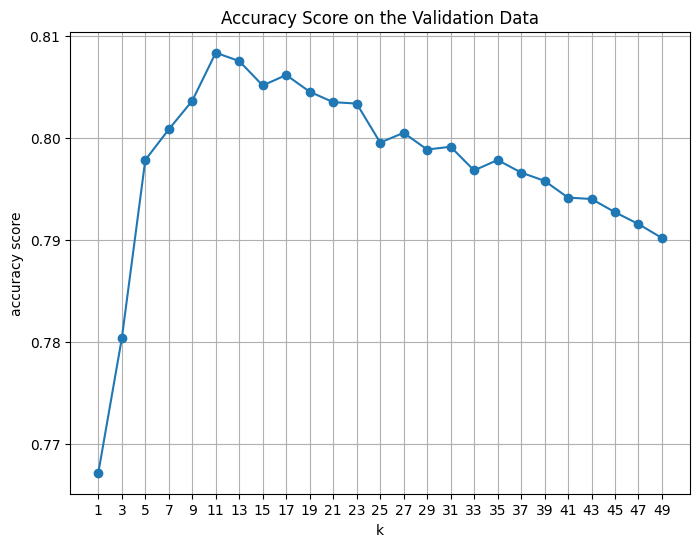

In [30]:
k_values = []
acc_score = []

for k in range(1, 50, 2):
    model = KNeighborsClassifier(n_neighbors = k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    acc_score.append(accuracy_score(y_valid, y_pred))
    k_values.append(k)


plt.figure(figsize = (8, 6))

plt.plot(k_values, acc_score, marker = "o")
plt.title("Accuracy Score on the Validation Data")
plt.xlabel("k")
plt.ylabel("accuracy score")
plt.xticks(k_values)
plt.grid();

In [ ]:
# The best k value comes at k = 11.

### using randomized search to get best model

In [31]:
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV

In [32]:
cv_scores = cross_val_score(KNeighborsClassifier(n_neighbors=10), 
                            X_valid, 
                            y_valid, 
                            cv=5, # no shuffle, stratified for classifiers, default value 5
                            #cv=KFold(n_splits=5, shuffle=True), 
                            #cv=StratifiedKFold(n_splits=5, shuffle=True),
                            #cv=RepeatedKFold(n_splits=5, n_repeats=3),
                            scoring='accuracy')

cv_scores

array([0.73957621, 0.72624744, 0.75623932, 0.75521368, 0.75863248])

[0.74 0.73 0.76 0.76 0.76]
Average accuracy: 0.7471818240239292
Accuracy standard deviation: 0.012439937092739842


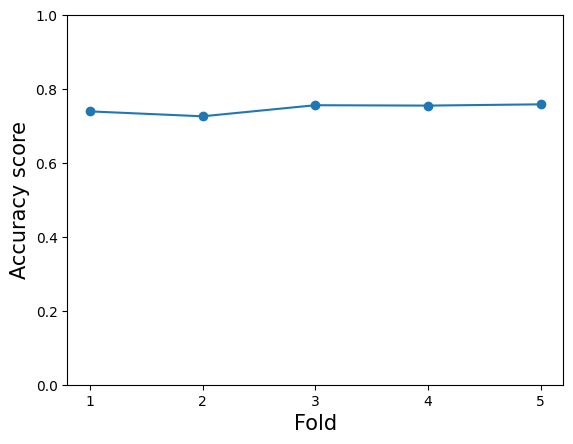

In [33]:
plt.plot(range(1, 6), cv_scores, marker='o')
plt.ylim(0, 1)
plt.ylabel('Accuracy score', fontsize=15)
plt.xlabel('Fold', fontsize=15)
plt.xticks(range(1,6))

print(np.round(cv_scores,2))
print('Average accuracy:', cv_scores.mean())
print('Accuracy standard deviation:', cv_scores.std());  

In [34]:
# randomized search with hyper parameter validation
rs = RandomizedSearchCV(estimator = KNeighborsClassifier(),
                        param_distributions = {"n_neighbors": range(1,51),
                                               "weights": ['uniform', 'distance'],
                                               "p": [1,2]},
                        cv=5,
                        n_iter=10)

rs.fit(X_valid, y_valid)

rs.best_score_

0.955083022240917

In [35]:
rs.best_params_

{'weights': 'distance', 'p': 1, 'n_neighbors': 21}

In [50]:
# best model 
best_knn = KNeighborsClassifier(weights = 'distance',p = 1, n_neighbors=21)
best_knn.fit(X_train,y_train)
filename = 'knn_class.sav'
pickle.dump(best_knn, open(filename, 'wb'))

### Accuracies of the models


In [37]:
# Best model training 
best_knn.fit(X_train,y_train)
# Accuracy scores of best tree on different datasets
y_train_pred = best_knn.predict(X_train)
print(f" The training data accuracy for the best model is {accuracy_score(y_train,y_train_pred)}")
y_valid_pred = best_knn.predict(X_valid) 
print(f" The validation data accuracy for the best model is {accuracy_score(y_valid,y_valid_pred)}")
y_test_pred = best_knn.predict(X_test)
print(f" The testing data accuracy for the best model is {accuracy_score(y_test,y_test_pred)}")
      

 The training data accuracy for the best model is 1.0
 The validation data accuracy for the best model is 0.9752512476926233
 The testing data accuracy for the best model is 0.977167076838939


### Confusion matrix of the models 

In [38]:
# confusion matrix for training data
print(confusion_matrix(y_train,y_train_pred))

[[2684    0    0    0    0    0    0    0    0    0    0]
 [   0 2563    0    0    0    0    0    0    0    0    0]
 [   0    0 2739    0    0    0    0    0    0    0    0]
 [   0    0    0 2688    0    0    0    0    0    0    0]
 [   0    0    0    0 2716    0    0    0    0    0    0]
 [   0    0    0    0    0 2608    0    0    0    0    0]
 [   0    0    0    0    0    0 2686    0    0    0    0]
 [   0    0    0    0    0    0    0 2656    0    0    0]
 [   0    0    0    0    0    0    0    0 2699    0    0]
 [   0    0    0    0    0    0    0    0    0 2617    0]
 [   0    0    0    0    0    0    0    0    0    0 2598]]


In [39]:
# confusion matrix for validation data
print(confusion_matrix(y_valid,y_valid_pred))

[[1270    0    2    0    0   60    0    0    0    0    0]
 [   1 1329    0    0    0    6    0    0    1   52    0]
 [   0    0 1289    0    0    1    0    0    0    0    0]
 [   0    0    0 1325    9    0    0    2    0    0    0]
 [   1    0    4   11 1258    0    0   28    0    0    0]
 [  31    2    0    0    2 1301    0    1    2    1    0]
 [   0    0    0    0    0    0 1305    0    0    0    0]
 [   0    0    0   26   17    2    0 1273    1    0    0]
 [   1    3    0    0    1    9    0    2 1309    0    0]
 [   1   79    0    0    0    3    0    0    0 1260    0]
 [   0    0    0    0    0    0    0    0    0    0 1346]]


In [41]:
# confusion matrix for test data
 # confusion matrix for training data
print(confusion_matrix(y_test,y_test_pred))

[[1249    0    0    0    0   54    0    0    0    0    0]
 [   1 1311    0    0    0    7    0    0    2   45    1]
 [   0    0 1289    0    0    1    0    0    0    0    0]
 [   0    0    0 1283   11    0    0    1    0    0    0]
 [   0    0    2   10 1266    1    0   22    0    0    0]
 [  26    4    0    0    3 1337    0    0    1    0    0]
 [   0    0    0    0    0    0 1328    0    0    0    0]
 [   0    0    0   12   20    2    0 1307    3    0    0]
 [   2    0    0    2    4    4    0    3 1280    0    0]
 [   0   85    1    0    0    3    0    0    0 1269    1]
 [   0    0    0    0    0    0    0    0    0    0 1375]]


### classification report for the models

In [42]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      2684
           2       1.00      1.00      1.00      2563
           3       1.00      1.00      1.00      2739
           4       1.00      1.00      1.00      2688
           5       1.00      1.00      1.00      2716
           6       1.00      1.00      1.00      2608
           7       1.00      1.00      1.00      2686
           8       1.00      1.00      1.00      2656
           9       1.00      1.00      1.00      2699
          10       1.00      1.00      1.00      2617
          11       1.00      1.00      1.00      2598

    accuracy                           1.00     29254
   macro avg       1.00      1.00      1.00     29254
weighted avg       1.00      1.00      1.00     29254



In [43]:
print(classification_report(y_valid,y_valid_pred))

              precision    recall  f1-score   support

           1       0.97      0.95      0.96      1332
           2       0.94      0.96      0.95      1389
           3       1.00      1.00      1.00      1290
           4       0.97      0.99      0.98      1336
           5       0.98      0.97      0.97      1302
           6       0.94      0.97      0.96      1340
           7       1.00      1.00      1.00      1305
           8       0.97      0.97      0.97      1319
           9       1.00      0.99      0.99      1325
          10       0.96      0.94      0.95      1343
          11       1.00      1.00      1.00      1346

    accuracy                           0.98     14627
   macro avg       0.98      0.98      0.98     14627
weighted avg       0.98      0.98      0.98     14627



In [44]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           1       0.98      0.96      0.97      1303
           2       0.94      0.96      0.95      1367
           3       1.00      1.00      1.00      1290
           4       0.98      0.99      0.99      1295
           5       0.97      0.97      0.97      1301
           6       0.95      0.98      0.96      1371
           7       1.00      1.00      1.00      1328
           8       0.98      0.97      0.98      1344
           9       1.00      0.99      0.99      1295
          10       0.97      0.93      0.95      1359
          11       1.00      1.00      1.00      1375

    accuracy                           0.98     14628
   macro avg       0.98      0.98      0.98     14628
weighted avg       0.98      0.98      0.98     14628



### Roc-auc score of the models 

In [45]:
# roc auc score for training data
y_train_prob = best_knn.predict_proba(X_train)
print(f" The roc_auc score for the training data is {roc_auc_score(y_train,y_train_prob,average='weighted',multi_class='ovr')}")
# roc auc score for the validation data
y_valid_prob = best_knn.predict_proba(X_valid)
print(f" The roc_auc score for the validation data is {roc_auc_score(y_valid,y_valid_prob,average='weighted',multi_class='ovr')}")
# roc auc score for the testing data
y_test_prob = best_knn.predict_proba(X_test)
print(f" The roc_auc score for the testing data is {roc_auc_score(y_test,y_test_prob,average='weighted',multi_class='ovr')}")

 The roc_auc score for the training data is 1.0
 The roc_auc score for the validation data is 0.9994504488611421
 The roc_auc score for the testing data is 0.9994541676847498


### Recall score of the models 

In [46]:
# recall score for training data
print(f" The recall score for the training data is {recall_score(y_train,y_train_pred,average= 'macro')}")
# recall score for validation data
print(f" The recall score for the validation data is {recall_score(y_valid,y_valid_pred,average= 'macro')}")
# recall score for test data
print(f" The recall score for the testing data is {recall_score(y_valid,y_valid_pred,average= 'macro')}")

 The recall score for the training data is 1.0
 The recall score for the validation data is 0.9754179299193132
 The recall score for the testing data is 0.9754179299193132


### F1 score of the models 

In [47]:
# F-1 score for training data
print(f" The f-1 score for the training data is {f1_score(y_train,y_train_pred,average= 'weighted')}")
# F-1 score for validation data
print(f" The f-1 score for the validation data is {f1_score(y_valid,y_valid_pred,average= 'weighted')}")
# F-1 score for test data
print(f" The f-1 score for the testing data is {f1_score(y_valid,y_valid_pred,average= 'weighted')}")

 The f-1 score for the training data is 1.0
 The f-1 score for the validation data is 0.9752555756811534
 The f-1 score for the testing data is 0.9752555756811534
